# Title: **Users Movie Preferences Analysis**

Notes:

This data was analyzed by **Shaden Albassam**.




---

### Raw Data:

**link**: https://github.com/amirtds/kaggle-netflix-tv-shows-and-movies

**About**: This data was acquired in May 2022 containing data available in the United States. This data set was created to list all shows available on Netflix streaming.



### Why this dataset?


A dataset that has many intreasing features, needs cleaning, and can challenge my data analysis and preprocessing skills. Addionally, I see movies as an interesting topic.



---



# **1. Problem Definition**

This analysis aims to explore the characteristics of movies produced between **1953 and 2022**, such as trends in genres, runtimes and their relationship with user preferences, as well as country distribution and production rates—to better understand the patterns and insights within Netflix’s movie catalog.


---



### Key Questions:

- Q1:
  
  How many genres are there and what are they? how many movie that falls under each genre?
  
  How many countries are there and what are they? how many movie produced by each country?

- Q2:
Top 10 Countries by Highest Average Weighted Score
- Q3: Is there a correlation between high production volume and overall movie quality?

- Q4:What is the correlation between Runtime and Ratings per Genre?
Does the length of a movie impact how highly its genre is rated, or is there no clear connection?
- Q5: What are Top 10 Genres by Average IMDb Score and Average TMDB Popularity?
- Q6:Is there a pattren where a certain genras has overrate/underrated movies? This is measured by comparing the correlation between hype and quality.
- Q7:

    What are the top 5 most underrated movies?
    
    What are the top 5 most overrated movies?
- Q8: Has production increased over time? is the demand higher than before?
- Q9: How do key movie metrics (Quality, Hype, Runtime, Votes) correlate with each other?

---


### Aimed Insights:

- To know what genres has the most produced movies, next to answer: are the most produced genres also have the highest ratings?
- Determining the dominant producing countries, and the geographical impact on production and if it affects the quality.
- Identifying how factors like Runtime or Popularity relate to the ultimate Weighted Score, helping to set expectations for film performance based on its attributes.
- Identifying any overrated/underrated movies and the pattrens that create this situation
- To know prudction rates over time.
- Is large production mean high or low quality? basic quality vs quantity relationship?
- Do shorter runtime movies gets higher ratings?
- Is genres with better production has is the most popular among people?
---




# **2. Dataset Description**

The dataset contains metadata for Netflix titles. In this analysis, we focus exclusively on movies, excluding series. This choice is driven by analytical considerations, such as differences in evaluation criteria and the need to examine movies in detail to uncover meaningful insights.




**This metadata include (15 feature):**
- ID: The title ID on JustWatch.
- title: The name of the title.
- show type: TV show or movie.
- description: A brief description --->  will be dropped
- release year: The release year.
- age certification: The age certification. ---> will be dropped
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production countries: A list of countries that produced the title.
- seasons: Number of seasons if it's a SHOW. ---> will be dropped
- IMDB ID: The title ID on IMDB.
- IMDB Score: Score on IMDB.
- IMDB Votes: Votes on IMDB.
- TMDB Popularity: Popularity on TMDB.
- TMDB Score: Score on TMDB.  ---> will be dropped.

So in conclusion: **11 Features** will be considered at this point.

---



# **3. Importing and Loading Dataset - Initial Data Exploration**


In [2]:
# Importing Libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


# Read Daat:
url = "https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/main/titles.csv"
df = pd.read_csv(url)

In [3]:
df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


# **4. Data Cleaning and Preprocessing**

In [4]:
# does type include missing values? we will check before we drop series
missing_type = df["type"].isna().sum()
print(f"Missing values in 'type' column: {missing_type}")
# and shape to compare after dropping series
print(f"Data frame shape: {df.shape}")

Missing values in 'type' column: 0
Data frame shape: (5806, 15)


In [5]:
# Filttering only movies:
df = df[df['type'] == "MOVIE"]
# shape after dropping series
print(f"Data frame shape: {df.shape}")

Data frame shape: (3759, 15)


In [6]:
#only important columns:
df = df[["id", "title", "type", "release_year", "runtime", "genres", "production_countries", "imdb_id", "imdb_score", "imdb_votes", "tmdb_popularity"]]
print(f"Data frame shape: {df.shape}")

Data frame shape: (3759, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3759 entries, 1 to 5804
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3759 non-null   object 
 1   title                 3758 non-null   object 
 2   type                  3759 non-null   object 
 3   release_year          3759 non-null   int64  
 4   runtime               3759 non-null   int64  
 5   genres                3759 non-null   object 
 6   production_countries  3759 non-null   object 
 7   imdb_id               3451 non-null   object 
 8   imdb_score            3407 non-null   float64
 9   imdb_votes            3391 non-null   float64
 10  tmdb_popularity       3698 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 352.4+ KB


In [8]:
df.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity'],
      dtype='object')

### Missing Values:

In [9]:
print(f"Any missing values:")
df.isna().sum()

Any missing values:


,0
id,0
title,1
type,0
release_year,0
runtime,0
genres,0
production_countries,0
imdb_id,308
imdb_score,352
imdb_votes,368


In [10]:
# Drop missing scores
df.dropna(subset=['imdb_score'], inplace=True)

# Fill missing votes with 0
df['imdb_votes'].fillna(0, inplace=True)

# Replace missing with (Title missing)
df['title'].fillna('Title Missing', inplace=True)


#Replace missing with 0
df['tmdb_popularity'].fillna(0, inplace=True)

print(f"Data frame shape: {df.shape}")
print(f"Any missing values:")
df.isna().sum()

Data frame shape: (3407, 11)
Any missing values:


,0
id,0
title,0
type,0
release_year,0
runtime,0
genres,0
production_countries,0
imdb_id,0
imdb_score,0
imdb_votes,0


### Justification:

- Missing values in imdb_score:
Drop missing scores to ensure the quality of our analysis. preventing bias that will occure if replaced with something.

- Missing values in imdb_votes:
Fill missing votes with 0. A missing vote count suggests low public interest.

- Missing values in title:
Replace with (Title Missing) to easily track unidentified content without losing the entire row.

- Missing values in tmdb_popularity:
 Missing tmdb popularity is usually cause of unpopularity - we are brievnting bias. Because popularity is a measure of current public interest and engagement. A missing value suggest no interest or tracking for that movie, making 0 the most logical.

---



### Duplication

In [11]:
exact_dup_count = df.duplicated().sum()
print(f"Number of exact duplicates: {exact_dup_count}")

Number of exact duplicates: 0


### Descriptive Statistics:

we will:
 - Display Statistics to: understand the distribution, central tendency, and detect possible outliers.
 - **Store** orignal mean, std, max, etc.. values to use it a standred for analysis and comparasion (will be discussed further on).
 - Notice **outliers** and fix them.


In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity
count,3407.00,3407.00,3407.00,3407.00,3407.00
mean,2015.20,101.54,6.27,26557.91,19.49
std,8.22,27.76,1.12,94504.92,60.49
min,1953.00,8.00,1.50,0.00,0.00
25%,2014.00,88.00,5.60,556.50,2.94
50%,2018.00,100.00,6.40,2610.00,6.89
75%,2020.00,116.00,7.10,12109.50,15.43
max,2022.00,235.00,9.00,2268288.00,1823.37


There is outlires in some features, here is the explaination and the justification of how we will respond to it:

There are features that have outliers but its represents the meaning of this analysis whic is the difference between score, changing it will effect the Validity of our analysis.

1. **imdb_votes**:

     We noticed a min = 5 votes VS. max =  2.27 M. this is extream difference and this will make movies will 2.27 M press the influance of low voted movies.

     **Solution**:

     Use numpy.log1p() which is a NumPy function that calculates the natural logarithm, this will better ditribute the data when we reflect them in our plots.

     Why this approach and not min - max or other approach?

     Beacuse we wanna reduce dispersion in the **visualization scaling only**. And **preserving data nature**. In addioon: Min-Max doesnt change the difference between data therefore it will note appeare in visualzation plots.


5. **tmdb_popularity**:

      We noticed diff between 0 pop (replaced for null) VS. 1823 pop, and 75% of the data fall beond 15 pop. This is beacuse some movies has great reputation wnd well knowen internationally.

      **Solution:**

      Use numpy.log1p() which is a NumPy function that calculates the natural logarithm, this will better ditribute the data when we reflect them in our plots.


In [13]:

# Create new column to clac the og of votes, use np.log1p() with +1 cause there is 0 values.
df['log_imdb_votes'] = np.log1p(df['imdb_votes'])

# New Column for log of populartity
df['log_tmdb_popularity'] = np.log1p(df['tmdb_popularity'])

print("2 New Columns Creatd!")

2 New Columns Creatd!


In [14]:
# Store original Stats.
#  1. IMDb Score
imdb_scores = df['imdb_score']

# --- Central tendency ---
mean_imdb_score   = imdb_scores.mean()     # Average
median_imdb_score = imdb_scores.median()   # Middle
mode_imdb_score   = imdb_scores.mode()     # Most frequent value

# --- Spread ---
min_imdb_score    = imdb_scores.min()
max_imdb_score    = imdb_scores.max()
range_imdb_score  = max_imdb_score - min_imdb_score  # The range of scores
std_imdb_score    = imdb_scores.std()

#  2. Runtime (Duration in minutes)
runtimes = df['runtime']
# --- Central tendency ---
mean_runtime   = runtimes.mean()
median_runtime = runtimes.median()
mode_runtime   = runtimes.mode()

# --- Spread ---
min_runtime    = runtimes.min()
max_runtime    = runtimes.max()
range_runtime  = max_runtime - min_runtime
std_runtime    = runtimes.std()

#  3. Log IMDb Votes
# NOTE: Log is for visualization purposes due to extreme outliers.
log_imdb_votes = df['log_imdb_votes']
# --- Central tendency ---
mean_log_votes   = log_imdb_votes.mean()
median_log_votes = log_imdb_votes.median()
mode_log_votes   = log_imdb_votes.mode()

# --- Spread ---
min_log_votes    = log_imdb_votes.min()
max_log_votes    = log_imdb_votes.max()
range_log_votes  = max_log_votes - min_log_votes
std_log_votes    = log_imdb_votes.std()

#  4. Log TMDB Popularity
# NOTE: Log  helps visualize the "Hype" factor on charts.
log_popularity = df['log_tmdb_popularity']
# --- Central tendency ---
mean_log_pop   = log_popularity.mean()
median_log_pop = log_popularity.median()
mode_log_pop   = log_popularity.mode()

# --- Spread ---
min_log_pop    = log_popularity.min()
max_log_pop    = log_popularity.max()
range_log_pop  = max_log_pop - min_log_pop
std_log_pop    = log_popularity.std()

### Fix Bias and issue (Score Vs. Number of Votes):

We noticed that a movie with high score avg but low number of votes will over suppress a movie with lower score avg but much more higher  number of votes, this will create unfair, unbalnced, unrealistic bias towards some movies, and will neglect the importance of number of votes.

     Higher number of votes ---> More valable score avg.

Prevent low votes number movies but high score to from topping the list in an unfair form.


**Solution**:

Therefore we will use a Weightd score formula that defines the relationship between Votes and Score.
This formula is orignally used by IMDB to solve this concern (Check the link below):
https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK#

**The formula**:
WR = ((v / (v+m)) × R)    +     ((m / (v+m)) × C)

**Our Usage**:

v --> Number of (imdb_votes) of one movie.

m --> Q3 (75%) of (mdb_votes) which is trust criteria, lowest num of votes needed to consider the score trustable.

R --> Avg (imdb_score) of one moive.

C --> Avg (org_mean_imdb_score) score of all movies in the list.


**Why Q3?**

Its defined be the level od strictness seen by the analyst, therefor we see Q3 is a fair high level of strictness.


In [15]:
# Create a new column for Weighted Score:

# Avg of total scoress
C = mean_imdb_score

# 2. lowes rate of trust to consider a score.
m = df['imdb_votes'].quantile(0.75)

# 3. New Function
def calculate_weighted_rating(df_row, m, C):
    v = df_row['imdb_votes']
    R = df_row['imdb_score']

    weighted_rating = (v / (v + m) * R) + (m / (v + m) * C)

    return weighted_rating

# 4. Apply fun on each row and add new column with values.
df['weighted_score'] = df.apply(calculate_weighted_rating, axis=1, m=m, C=C)

# display top 5:
print("\nTop 5 Movies based on Weighted Score:\n")
print(df[['title', 'imdb_score', 'imdb_votes', 'weighted_score']].sort_values('weighted_score', ascending=False).head(5))


Top 5 Movies based on Weighted Score:

                   title  imdb_score  imdb_votes  weighted_score
260            Inception        8.80  2268288.00            8.79
108         Forrest Gump        8.80  1994599.00            8.78
111  Saving Private Ryan        8.60  1346020.00            8.58
706     Django Unchained        8.40  1472668.00            8.38
368             3 Idiots        8.40   385782.00            8.34


In [17]:
#Display new shape and columns:
print("\nNew Shape: \n")
print(df.shape)
print("\n\nNew Columns: \n")
df.columns


New Shape: 

(3407, 14)


New Columns: 



Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'log_imdb_votes', 'log_tmdb_popularity',
       'weighted_score'],
      dtype='object')

### Issue: Several countries and Generas for some movies

Countries and genras are stores as string list, we cant make our case and analysis without seperating them.

In [18]:
import re  # we will use it to store string list as an actual list


#store an actual genra list in a new column: by taking finding nas storing all vakues that are found between single quoutaions:
df['genre_list'] = df['genres'].str.findall(r"'(.*?)'")

# explode to seperate genras for each movie (this will doublicate movies)
#thats why we stored the orginal mean of score (dublicated movie --> dubliated score)
df_working_1 = df.explode('genre_list').copy() # pands function for this perp

# 3. remove spaces (clean)
df_working_1['single_genre'] = df_working_1['genre_list'].str.strip()


# Countries:
df_working_1['country_list'] = df_working_1['production_countries'].str.findall(r"'(.*?)'")

# Seperate countries list found in the new column: country_list.
df_final_exploded = df_working_1.explode('country_list').copy()

# Clean white spaces
df_final_exploded['single_country'] = df_final_exploded['country_list'].str.strip()


######################################
# Final cleaning

# 1. Remove rows that are empty
df_final_exploded = df_final_exploded[df_final_exploded['single_genre'] != '']
df_final_exploded = df_final_exploded[df_final_exploded['single_country'] != '']


# 2. List of wanted final columns
columns_to_keep_final = [
    'id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'log_imdb_votes', 'log_tmdb_popularity',
       'weighted_score',
    # New columns for grouping analysis
    'single_genre',
    'single_country'
]

movies_df_final = df_final_exploded[columns_to_keep_final].reset_index(drop=True)

print("\nDataFrame succesfully exploded!!!!\n\n")

# Save final DF.
movies_df_final.to_csv('movies_final_analysis_cleaned.csv', index=False)


DataFrame succesfully exploded!!!!




In [19]:
movies_df_final.shape

(10846, 16)

In [28]:
movies_df_final.head(10)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,log_imdb_votes,log_tmdb_popularity,weighted_score,single_genre,single_country
0,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.30,795222.00,27.61,13.59,3.35,8.27,crime,US
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.30,795222.00,27.61,13.59,3.35,8.27,drama,US
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.20,530877.00,18.22,13.18,2.96,8.16,comedy,GB
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.20,530877.00,18.22,13.18,2.96,8.16,fantasy,GB
4,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],tt0079470,8.00,392419.00,17.50,12.88,2.92,7.95,comedy,GB
5,tm190788,The Exorcist,MOVIE,1973,133,['horror'],['US'],tt0070047,8.10,391942.00,95.34,12.88,4.57,8.05,horror,US
6,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'crime', 'action']",['US'],tt0066999,7.70,153463.00,14.74,11.94,2.76,7.60,thriller,US
7,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'crime', 'action']",['US'],tt0066999,7.70,153463.00,14.74,11.94,2.76,7.60,crime,US
8,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'crime', 'action']",['US'],tt0066999,7.70,153463.00,14.74,11.94,2.76,7.60,action,US
9,tm185072,My Fair Lady,MOVIE,1964,170,"['drama', 'music', 'romance', 'family']",['US'],tt0058385,7.80,94121.00,15.95,11.45,2.83,7.63,drama,US


## **Data is now clean and ready for EDA**

# **5. Exploratory Data Analysis (EDA)**

We will be asking questions and answer them.

**Q1**:

 - How many genres are there and what are they? how many movie that falls under each genre?
- How many countries are there and what are they? how many movie preduced by each country?


**Insight**:

 - To know what genras has the most prduced movies, and for further analysis, are the most preduced genres also have the highest ratings?
 - Determining the dominant producing countries, andthe geographical impact on production.

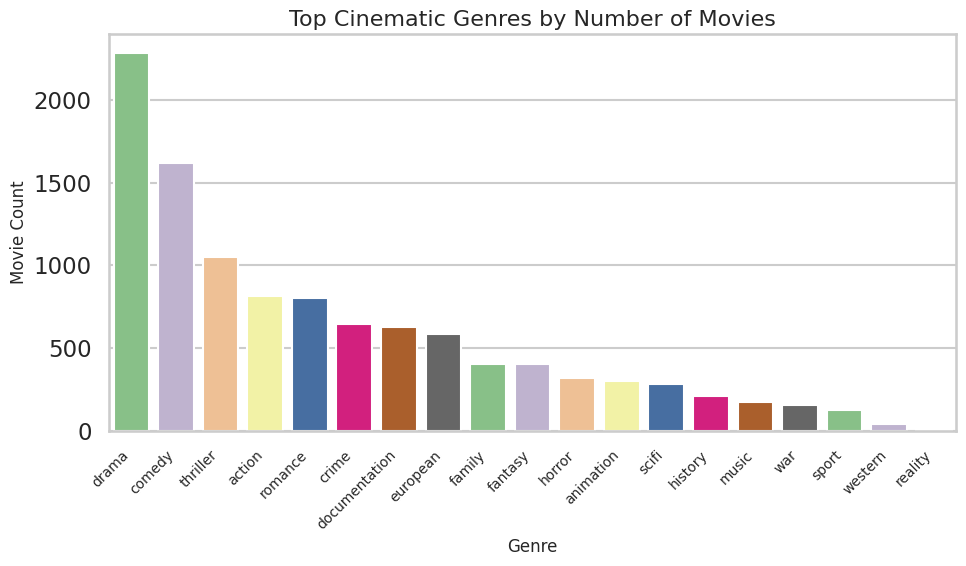

In [20]:
# calc the count of movies per genre
genre_counts = movies_df_final['single_genre'].value_counts()

# Plot 1:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Accent", ax=plt.gca())

plt.title('Top Cinematic Genres by Number of Movies', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels for better fit
plt.tight_layout()
plt.show()

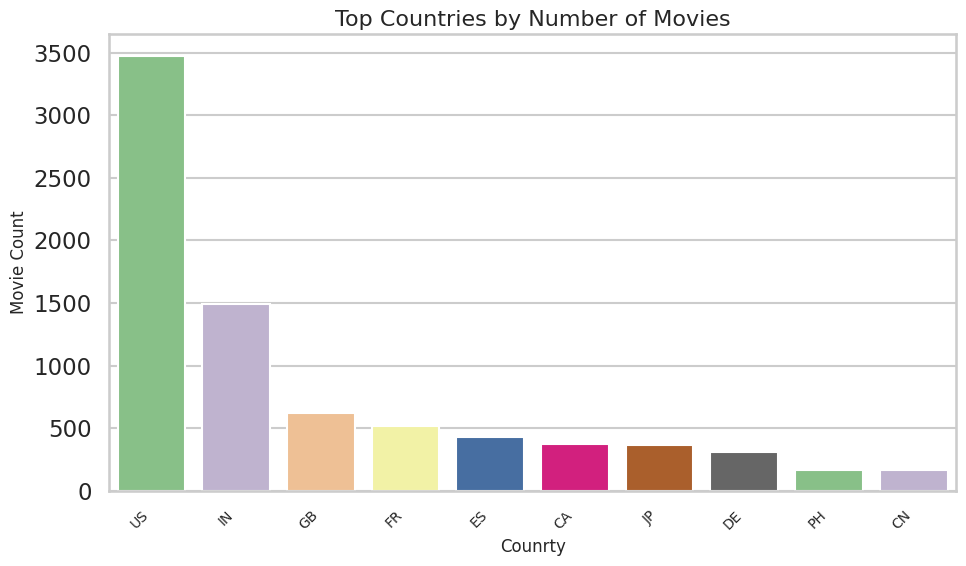

In [21]:
#(Top 10) coutries cause there is too many
countries_counts = movies_df_final['single_country'].value_counts().head(10)

# Plot 2:
plt.figure(figsize=(10, 6))
sns.barplot(x=countries_counts.index, y=countries_counts.values, palette="Accent", ax=plt.gca())

plt.title('Top Countries by Number of Movies', fontsize=16)
plt.xlabel('Counrty', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels for better fit
plt.tight_layout()
plt.show()

                      
 - **US**: United States
 - **IN**: India
 - **GB**: United Kingdom (Great Britain)
 - **FR**: France
 - **ES**: Spain
 - **CA**: Canada
 - **JP**: Japan
 - **DE**: Germany
 - **PH**: Philippines
 - **CN**: China


Insight: Top was United States and India next.

**Q2**:
Top 10 Countries by Highest Average Weighted Score

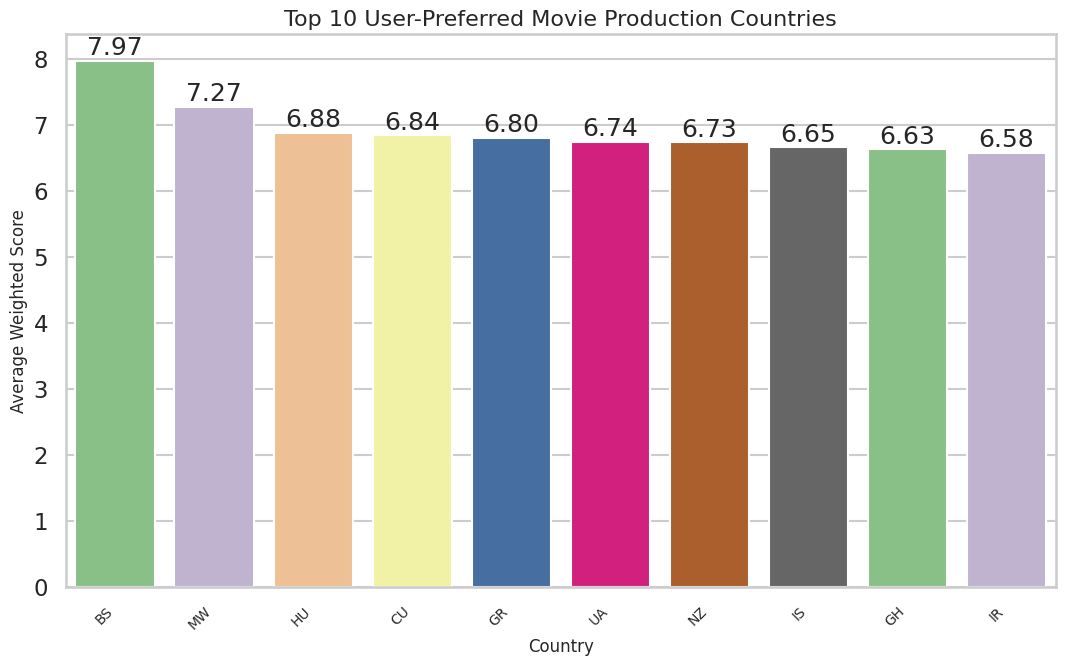


Top 10 Countries by Average Weighted Score:
  single_country  weighted_score
0             BS            7.97
1             MW            7.27
2             HU            6.88
3             CU            6.84
4             GR            6.80
5             UA            6.74
6             NZ            6.73
7             IS            6.65
8             GH            6.63
9             IR            6.58


In [22]:
country_quality = movies_df_final.groupby('single_country')['weighted_score'].mean()

# Select the top 10 and convert to a dF
top_10_countries = country_quality.sort_values(ascending=False).head(10).reset_index()

#plot 3:
plt.figure(figsize=(11, 7))

# Plot the average Weighted Score using country codes
ax = sns.barplot(x='single_country', y='weighted_score', data=top_10_countries, palette="Accent", ax=plt.gca())

# Set plot title and labels (using codes and English titles)
plt.title('Top 10 User-Preferred Movie Production Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Weighted Score', fontsize=12)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Print the top results table
print("\nTop 10 Countries by Average Weighted Score:")
print(top_10_countries)

**Q3**:
Is there a correlation between high production volume and overall movie quality?

As shown we may see as a takeaway that high production might have a inverse correlation with quality of production (Quality VS. Quantatiy)

**Q4**:
What is the correlation between Runtime and Ratings per Genre?
Does the length of a movie impact how highly its genre is rated, or is there no clear connection?

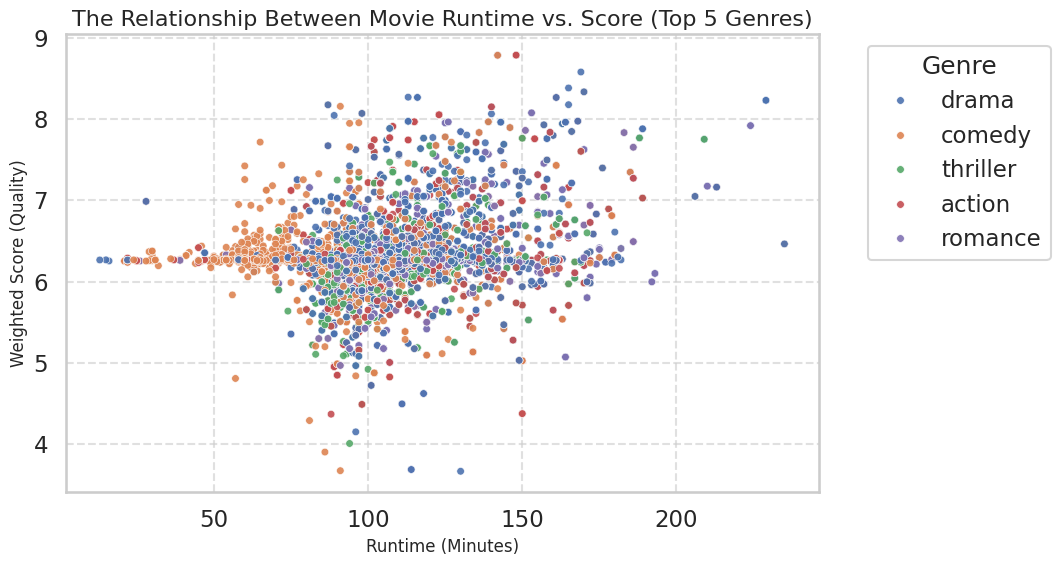


Overall Correlation between Runtime and Weighted Score: 0.264


In [23]:
# top 5 genres for clearer visualization
top_5_genres = movies_df_final['single_genre'].value_counts().head(5).index.tolist()
df_plot = movies_df_final[movies_df_final['single_genre'].isin(top_5_genres)].copy()


# Plot 4:
plt.figure(figsize=(11, 6))

sns.scatterplot( x='runtime',  y='weighted_score',  hue='single_genre',  data=df_plot,
    s=30, # size of points
    alpha=0.9, # transparency
    ax=plt.gca()
)

#  plot titles
plt.title('The Relationship Between Movie Runtime vs. Score (Top 5 Genres)', fontsize=16)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.ylabel('Weighted Score (Quality)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print key statistics (Overall correlation)
correlation = movies_df_final['runtime'].corr(movies_df_final['weighted_score'])
print(f"\nOverall Correlation between Runtime and Weighted Score: {correlation:.3f}")

**Insight**:

we see a dense cluster of movies across all genres, indicating no strong relationship between runtime and ratings. Most movies, regardless of length, fall within a similar rating range. However, there is a slight increase in ratings for some longer movies, which may reflect higher-budget, or classic films that traditionally have longer runtimes, and cause of their well-known producers.

**Q5**:
What are Top 10 Genres by Average IMDb Score and Average TMDB Popularity?

In [24]:
# Group by genre, calculating the mean for both original IMDb Score and original TMDB Popularity
# We use original values here as requested for "Average" metrics.
genre_averages = movies_df_final.groupby('single_genre').agg( Avg_IMDb_Score=('imdb_score', 'mean'), Avg_TMDB_Popularity=('tmdb_popularity', 'mean'), Total_Count=('id', 'count') # Added count for context
).reset_index()

# Rank and Select Top 10 by IMDb Scor
# Create one table ranked by Average IMDb Score
top_10_score = genre_averages.sort_values(by='Avg_IMDb_Score', ascending=False).head(10).copy()

# Rank and Select Top 10 by TMDB Popularity
# Create a second table ranked by Average TMDB Popularity
top_10_popularity = genre_averages.sort_values(by='Avg_TMDB_Popularity', ascending=False).head(10).copy()



# Generate Markdown Tables
# Rename columns for clear display in the report
score_table = top_10_score[['single_genre', 'Avg_IMDb_Score', 'Total_Count', 'Avg_TMDB_Popularity'
]].rename(columns={'single_genre': 'Genre', 'Avg_IMDb_Score': 'Avg IMDb Score','Total_Count': 'Movie Count', 'Avg_TMDB_Popularity': 'Avg TMDB Popularity'})

popularity_table = top_10_popularity[['single_genre', 'Avg_IMDb_Score', 'Total_Count', 'Avg_TMDB_Popularity'
]].rename(columns= {'single_genre': 'Genre', 'Avg_IMDb_Score': 'Avg IMDb Score', 'Total_Count': 'Movie Count', 'Avg_TMDB_Popularity': 'Avg TMDB Popularity'})


print("🌟 Top 10 Genres Ranked by Highest Average IMDb Score")
print(score_table.to_markdown(index=False, floatfmt=".2f"))

print("\n📈 Top 10 Genres Ranked by Highest Average TMDB Popularity")
print(popularity_table.to_markdown(index=False, floatfmt=".2f"))

🌟 Top 10 Genres Ranked by Highest Average IMDb Score
| Genre         |   Avg IMDb Score |   Movie Count |   Avg TMDB Popularity |
|:--------------|-----------------:|--------------:|----------------------:|
| documentation |             6.98 |           626 |                  8.61 |
| history       |             6.96 |           210 |                 17.16 |
| war           |             6.92 |           158 |                 23.99 |
| reality       |             6.80 |            11 |                 22.29 |
| music         |             6.60 |           171 |                 15.99 |
| sport         |             6.52 |           125 |                 14.77 |
| western       |             6.45 |            43 |                 31.83 |
| european      |             6.43 |           585 |                 14.04 |
| drama         |             6.39 |          2282 |                 20.14 |
| animation     |             6.39 |           301 |                 35.01 |

📈 Top 10 Genres Ranked

The comparison between the two rankings shows that highly rated genres are not necessarily the most popular ones. Genres like documentary, history, and war achieve strong IMDb scores, reflecting solid production quality, depth, and storytelling — but they do not appear in the top list of genres preferred by viewers based on TMDB popularity.


On the other hand, genres such as sci-fi, action, fantasy, and thriller dominate popularity scores despite having more moderate average ratings. This suggests that audiences tend to gravitate toward genres with more entertainment value, excitement, and mass appeal, rather than those that are more informative or "serious".


---



**Q6**: Is there a pattren where a certain genras has overrate/underrated movies?
This is measured by comparing the correlation between hype and quality.



 - Overrated: High Popularity (Y-axis) but Low Weighted Score (X-axis). (Top-left).

- Underrated: High Weighted Score (X-axis) but Low Popularity (Y-axis). (Bottom-right).

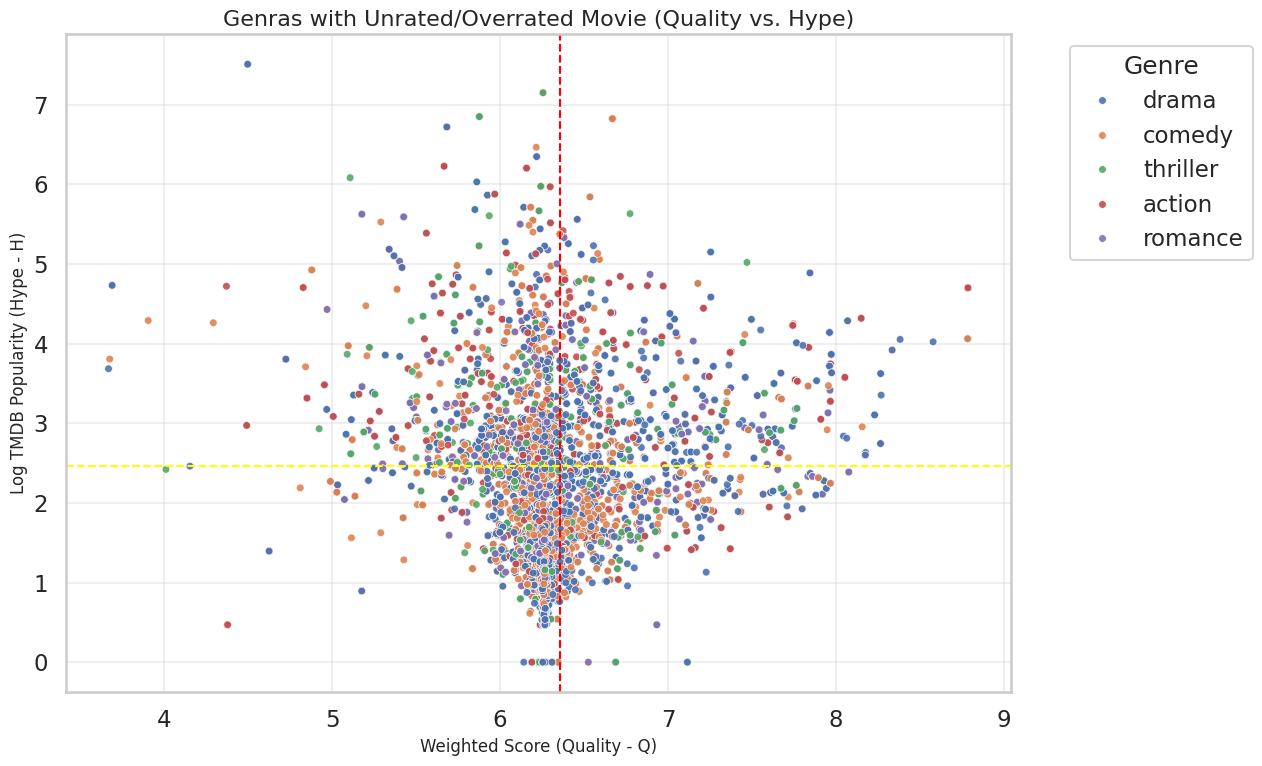

Movies in the top-left quadrant are highly overrated.
Movies in the bottom-right quadrant are highly underrated.


In [25]:
# Overall Mean Weighted Score (Vertical Line)
mean_wr = movies_df_final['weighted_score'].mean()

# Overall Mean Log Popularity (Horizontal Line)
mean_log_pop = movies_df_final['log_tmdb_popularity'].mean()

# top 5 genres for clear visualss
top_5_genres = movies_df_final['single_genre'].value_counts().head(5).index.tolist()
df_plot = movies_df_final[movies_df_final['single_genre'].isin(top_5_genres)].copy()


# plot 6:
plt.figure(figsize=(13, 8))

sns.scatterplot( x='weighted_score',  y='log_tmdb_popularity',  hue='single_genre', # Color-code by genre
    data=df_plot, s=30, alpha=0.9, ax=plt.gca()
)

# Add Unrated/Overrated lines

# Vertical Line (Mean Weighted Score - Quality Threshold)
plt.axvline(x=mean_wr, color='red', linestyle='--', linewidth=1.5)

# Horizontal Line (Mean Log Popularity - Hype Threshold)
plt.axhline(y=mean_log_pop, color='yellow', linestyle='--', linewidth=1.5)



# Set final labels and title
plt.title('Genras with Unrated/Overrated Movie (Quality vs. Hype)', fontsize=16)
plt.xlabel('Weighted Score (Quality - Q)', fontsize=12)
plt.ylabel('Log TMDB Popularity (Hype - H)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Movies in the top-left quadrant are highly overrated.")
print("Movies in the bottom-right quadrant are highly underrated.")

We notice a great amount of underrated movies in the most watched genras, but greater in overrated movies than those how have fair hype and quality rates. This might be a cause of that a lot of people tend to follow the crowd?

**Q7**:
- What are the top 5 most underrated movies?
- What are the top 5 most overrated movies?


In [26]:
# avg od score
C_ = movies_df_final['imdb_score'].mean()
m_threshold = movies_df_final['imdb_votes'].quantile(0.75)

# df for unque movies
# we need to drop duplicate rows that resulted from the double-explode
# so each movie is counted only once for ranking.
unique_movies = movies_df_final.sort_values(by='imdb_votes', ascending=False).drop_duplicates(subset=['id'], keep='first').copy()

# Filter to include only the top 5 genres for 'single_genre' display (optional but consistent with plot)
top_genres = movies_df_final['single_genre'].value_counts().head(5).index.tolist()
unique_movies['single_genre'] = unique_movies['single_genre'].apply(lambda x: x if x in top_genres else 'Other')


# Identify Underrated Movies (High Quality, Low Hype)

# Underrated condition: weighted_score > mean_wr AND log_tmdb_popularity < mean_log_pop
# We rank by the difference: (Weighted Score - Log Popularity) to find the most extreme dif
underrated_df = unique_movies[
    (unique_movies['weighted_score'] > mean_wr) & (unique_movies['log_tmdb_popularity'] < mean_log_pop)].copy()

# The difference determines how far the movie is from the Hype line towards Quality
underrated_df['underrated_rank'] = underrated_df['weighted_score'] - underrated_df['log_tmdb_popularity']

top_underrated = underrated_df.sort_values(by='underrated_rank', ascending=False).head(5)





# Identify Overrated Movies (Low Quality, High Hype)

# Overrated condition: weighted_score < mean_wr AND log_tmdb_popularity > mean_log_pop
# We rank by the difference: (Log Popularity - Weighted Score) to find the most extreme hype
overrated_df = unique_movies[
    (unique_movies['weighted_score'] < mean_wr) & (unique_movies['log_tmdb_popularity'] > mean_log_pop)].copy()

# The difference determines how far the movie is from the Quality line towards Hype
overrated_df['overrated_rank'] = overrated_df['log_tmdb_popularity'] - overrated_df['weighted_score']

top_overrated = overrated_df.sort_values(by='overrated_rank', ascending=False).head(5)


# --- 5. Generate Markdown Tables ---

underrated_table = top_underrated[['title', 'single_genre', 'imdb_score', 'weighted_score', 'tmdb_popularity'
]].rename(columns={'title': 'Title', 'single_genre': 'Genre','imdb_score': 'IMDb Score (R)','weighted_score': 'Weighted Score (WR)','tmdb_popularity': 'TMDB Popularity'})


overrated_table = top_overrated[['title', 'single_genre', 'imdb_score', 'weighted_score', 'tmdb_popularity'
]].rename(columns={'title': 'Title', 'single_genre': 'Genre', 'imdb_score': 'IMDb Score (R)', 'weighted_score': 'Weighted Score (WR)','tmdb_popularity': 'TMDB Popularity'})

print("✨ Top 5 Underrated Movies (High Quality / Low Hype)")
print(underrated_table.to_markdown(index=False, floatfmt=".2f"))

print("\n🎬Top 5 Overrated Movies (Low Quality / High Hype)")
print(overrated_table.to_markdown(index=False, floatfmt=".2f"))

✨ Top 5 Underrated Movies (High Quality / Low Hype)
| Title                  | Genre   |   IMDb Score (R) |   Weighted Score (WR) |   TMDB Popularity |
|:-----------------------|:--------|-----------------:|----------------------:|------------------:|
| The Blue Elephant 2    | drama   |             8.20 |                  7.12 |              0.00 |
| Etharkkum Thunindhavan | Other   |             7.20 |                  6.69 |              0.00 |
| Kappela                | romance |             7.50 |                  6.53 |              0.00 |
| Omar                   | Other   |             7.50 |                  6.93 |              0.60 |
| C/o Kancharapalem      | drama   |             9.00 |                  7.23 |              2.10 |

🎬Top 5 Overrated Movies (Low Quality / High Hype)
| Title                   | Genre   |   IMDb Score (R) |   Weighted Score (WR) |   TMDB Popularity |
|:------------------------|:--------|-----------------:|----------------------:|----------------

**Q8**:
Has production increased over time? is the demand higher than before?

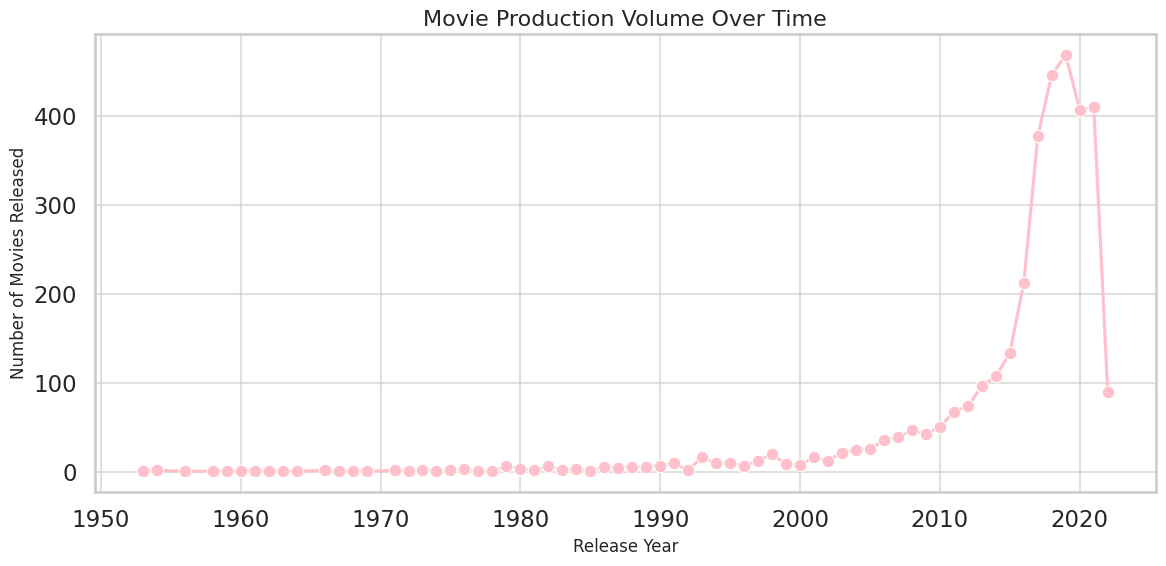


Movie Production Count by Year (Sample):
    Year  Movie_Count
56  2013           97
57  2014          108
58  2015          134
59  2016          213
60  2017          378
61  2018          447
62  2019          469
63  2020          407
64  2021          411
65  2022           90


In [27]:
# Group by the release year and count the number of movie IDs
# We count unique movie IDs per year to acc refliction of movie volume, even with exploded data
production_volume = movies_df_final.groupby('release_year')['id'].nunique().reset_index()
production_volume.columns = ['Year', 'Movie_Count']


# plot 7:
plt.figure(figsize=(12, 6))

# We use a Line Plot to show smothing over time
sns.lineplot(x='Year',  y='Movie_Count',  data=production_volume, marker='o', color='#FFC0CB',ax=plt.gca())


# Set plot title and labels
plt.title('Movie Production Volume Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.grid(True, alpha=0.6)

plt.tight_layout()
plt.show()

# Print the final counts for report reference
print("\nMovie Production Count by Year (Sample):")
print(production_volume.tail(10))

**Insight**:
We observe a noticeable drop in movie production in 2022. However, this decline is most likely due to limitations within the dataset, which includes only movies currently available on Netflix. Many titles released in 2022 may not have been added to the platform yet, which reduces the count.

Therefore, we **acknowledge** that the dataset has significant limitations that impact the validity and completeness of this analysis.

**Q9**:
How do key movie metrics (Quality, Hype, Runtime, Votes) correlate with each other?


**Insight:** The heatmap provides a comprehensive view of the dataset's underlying structure. The main value here is identifying how factors like **Runtime** or **Popularity** relate to the ultimate **Weighted Score**, helping to set expectations for film performance based on its attributes.

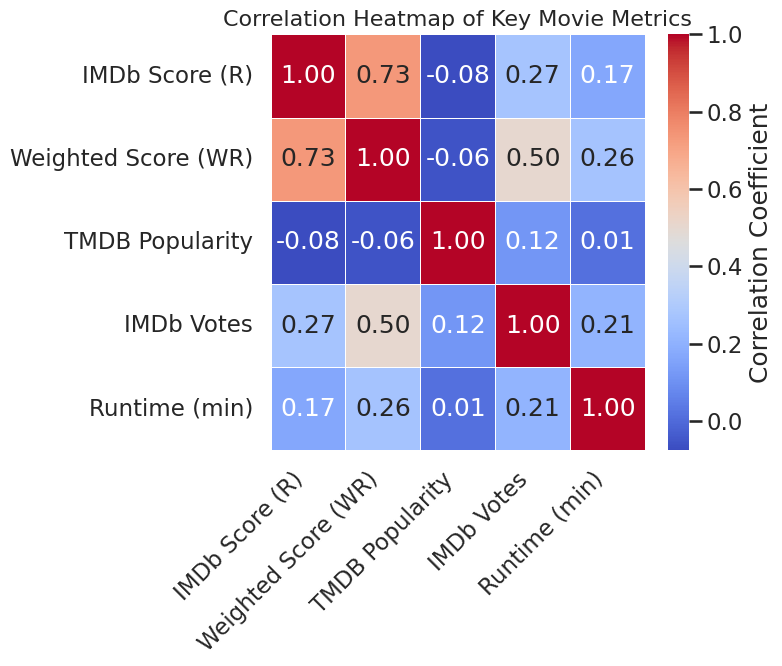

In [28]:
correlation_data = movies_df_final[['imdb_score',  'weighted_score', 'tmdb_popularity',  'imdb_votes', 'runtime']].copy()

correlation_data.columns = ['IMDb Score (R)', 'Weighted Score (WR)', 'TMDB Popularity', 'IMDb Votes','Runtime (min)']

# Calculate ccorrelation matrix
correlation_matrix = correlation_data.corr()

# plot 8:
plt.figure(figsize=(8, 7))

# Create the heatmap
sns.heatmap( correlation_matrix,
    annot=True,          # values numbers
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,       # Add lines between cells for clarity
    cbar_kws={'label': 'Correlation Coefficient'}
)


plt.title('Correlation Heatmap of Key Movie Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Key Takeaway from the Heatmap



### 1. **Quality vs. Quality/Confidence**

* **Weighted Score (WR) VS. IMDb Score:** This correlation should be very high (likely 0.9 or 1.0). This confirms that the **Weighted Score** is an excellent indicator of true quality, but it is slightly adjusted by the vote volume.

### 2. **Hype vs. Quality**

* **TMDB Popularity vs. IMDb Score (R) / Weighted Score (WR):** The correlation here is **moderate**.
    * **Takeaway:** This indicates that while better-quality movies tend to generate more buzz/interest, **hype is not a perfect predictor of quality**. The relatively weak correlation confirms the value of the Overrated/Underrated plot (Q6).

# **6. Key Takeaways and Conclusion**


### KEY TAKEAWAYS:
- Weighted Rating (WR) closely tracks IMDb score, but slightly adjusts for vote count—meaning movies with high ratings but very few votes are toned down.
- Popularity does not strongly correlate with quality. Popular movies are not necessarily highly rated, and highly rated movies often have low popularity.
- Some movies appear overrated (high popularity, lower rating) while others are underrated (low popularity, high rating), proving that audience hype does not always match actual quality perception, and genre bias: comedies & action tend to get harsher ratings.
- Most movies cluster around a typical runtime (~90–120 mins). Very long or very short films tend to receive more extreme ratings (very high or very low).- - There is steady movie production growth over time, indicating industry expansion and lower barriers to entry (e.g: streaming platforms, indie production).
- Highly rated movies tend to have more votes, suggesting that films with larger audiences accumulate more stable and reliable scores.


**Across all plots, the consistent takeaway is: Popularity ≠ Quality, and movie metrics like rating, votes, and hype each capture different aspects of audience behavior and none of them tell teh full story alone.**



### LIMITATIONS:
- WR depends heavily on the formula you chose.

- Movies with niche audiences may be underrepresented.
- New releases get a boost, older classics may look “unpopular.”
- Multiple-genre movies counted more than once, no main genre in the dataset for one movie.
- Dataset likely incomplete for older years, and doesn't actually include all movies in all years, only shows those availale on Netflix platform, where the analysis would be much more accurate if it covered the entire IMDB dataset of movies.
- Bias toward mainstream films.
- Classic movies accumulate more votes simply because they’re older.
- False assumption that more votes ---> higher quality (not always true).




---



### Conclusion:
This analysis revealed insights that were not visible at first glance nor through simple observation. By uncovering hidden patterns in ratings, popularity, genres, and audience behavior, the findings highlight how essential data analysis is for guiding decisions in film production, content acquisition, and platform investment strategies.

Thank you for reading this notebook.

30 Nov 2025